<a href="https://colab.research.google.com/github/dsharma-memphis/DataMiningProject/blob/main/FDS_parkinson_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
install.packages("GGally")
library(GGally)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [ ]:
install.packages(c("mlbench","caret"))
library(mlbench)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:
dataset_path <- '/content/parkinsons.csv'
pd_data <- read.csv(dataset_path)

head(pd_data)

,name,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,⋯,Shimmer.DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,⋯,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,⋯,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,⋯,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,⋯,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,⋯,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,⋯,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [ ]:
dim(pd_data)
str(pd_data)

[1] 195  24

'data.frame':	195 obs. of  24 variables:
 $ name            : chr  "phon_R01_S01_1" "phon_R01_S01_2" "phon_R01_S01_3" "phon_R01_S01_4" ...
 $ MDVP.Fo.Hz.     : num  120 122 117 117 116 ...
 $ MDVP.Fhi.Hz.    : num  157 149 131 138 142 ...
 $ MDVP.Flo.Hz.    : num  75 114 112 111 111 ...
 $ MDVP.Jitter...  : num  0.00784 0.00968 0.0105 0.00997 0.01284 ...
 $ MDVP.Jitter.Abs.: num  0.00007 0.00008 0.00009 0.00009 0.00011 0.00008 0.00003 0.00003 0.00006 0.00006 ...
 $ MDVP.RAP        : num  0.0037 0.00465 0.00544 0.00502 0.00655 0.00463 0.00155 0.00144 0.00293 0.00268 ...
 $ MDVP.PPQ        : num  0.00554 0.00696 0.00781 0.00698 0.00908 0.0075 0.00202 0.00182 0.00332 0.00332 ...
 $ Jitter.DDP      : num  0.0111 0.0139 0.0163 0.015 0.0197 ...
 $ MDVP.Shimmer    : num  0.0437 0.0613 0.0523 0.0549 0.0643 ...
 $ MDVP.Shimmer.dB.: num  0.426 0.626 0.482 0.517 0.584 0.456 0.14 0.134 0.191 0.255 ...
 $ Shimmer.APQ3    : num  0.0218 0.0313 0.0276 0.0292 0.0349 ...
 $ Shimmer.APQ5    : num  0.0313

In [ ]:
#checking entries with status 0 and status 1

#checking only 'status' column
#using a new variable called 'status_val'
status_val<-pd_data[,c("status")]
print(status_val)

#number of entries with status = 0 i.e. Healthy People
sum(status_val==0) #48

#number of entries with status = 1 i.e. People with Parkinson's Disease
sum(status_val==1) #147
#Total 195

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 [38] 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
[186] 0 0 0 0 0 0 0 0 0 0


[1] 48

[1] 147

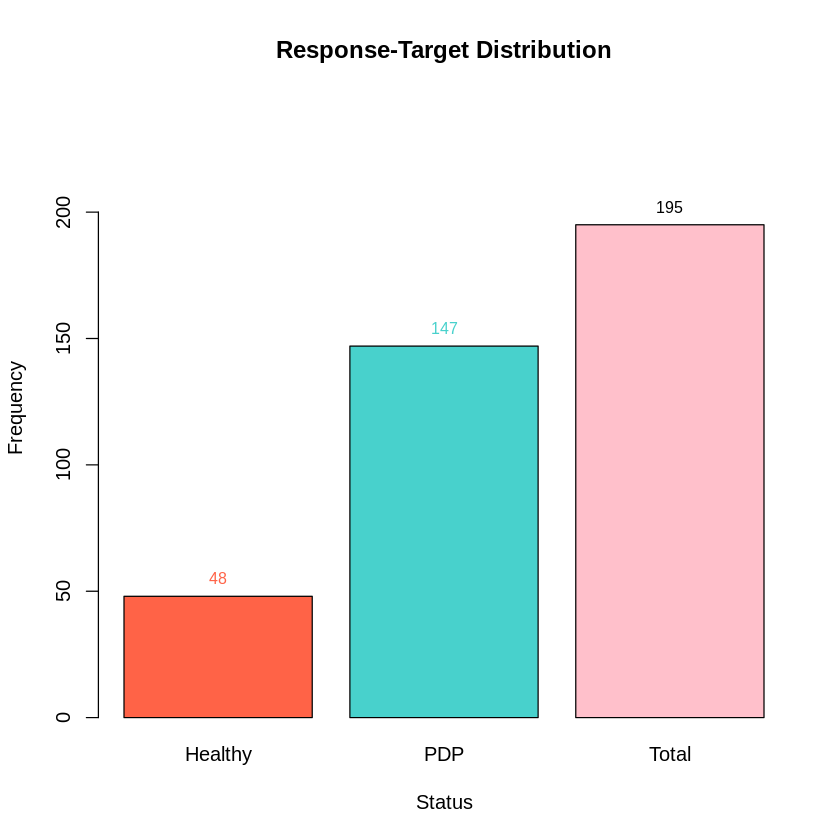

In [ ]:
tbl <- as.vector(c(with(pd_data, table(status)), as.numeric(nrow(pd_data))))
bp <- barplot(tbl, beside = TRUE, names.arg = c("Healthy", "PDP", "Total"),
        ylab="Frequency", xlab="Status", ylim= c(0,max(tbl)+50),
        main="Response-Target Distribution" ,col=c("tomato","mediumturquoise","pink"))
text(x = bp, y = tbl, label = tbl,
     pos = 3, cex = 0.8, col = c("tomato","mediumturquoise","black"))

In [ ]:
#removing the name attribute for correlation
pd_data1 <- pd_data[c(2:24)]
pd_data1
colnames(pd_data1)

MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,⋯,Shimmer.DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,⋯,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,⋯,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,⋯,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,⋯,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,⋯,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,⋯,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,⋯,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,⋯,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,⋯,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571


[1] "MDVP.Fo.Hz."      "MDVP.Fhi.Hz."     "MDVP.Flo.Hz."     "MDVP.Jitter..."  
 [5] "MDVP.Jitter.Abs." "MDVP.RAP"         "MDVP.PPQ"         "Jitter.DDP"      
 [9] "MDVP.Shimmer"     "MDVP.Shimmer.dB." "Shimmer.APQ3"     "Shimmer.APQ5"    
[13] "MDVP.APQ"         "Shimmer.DDA"      "NHR"              "HNR"             
[17] "status"           "RPDE"             "DFA"              "spread1"         
[21] "spread2"          "D2"               "PPE"

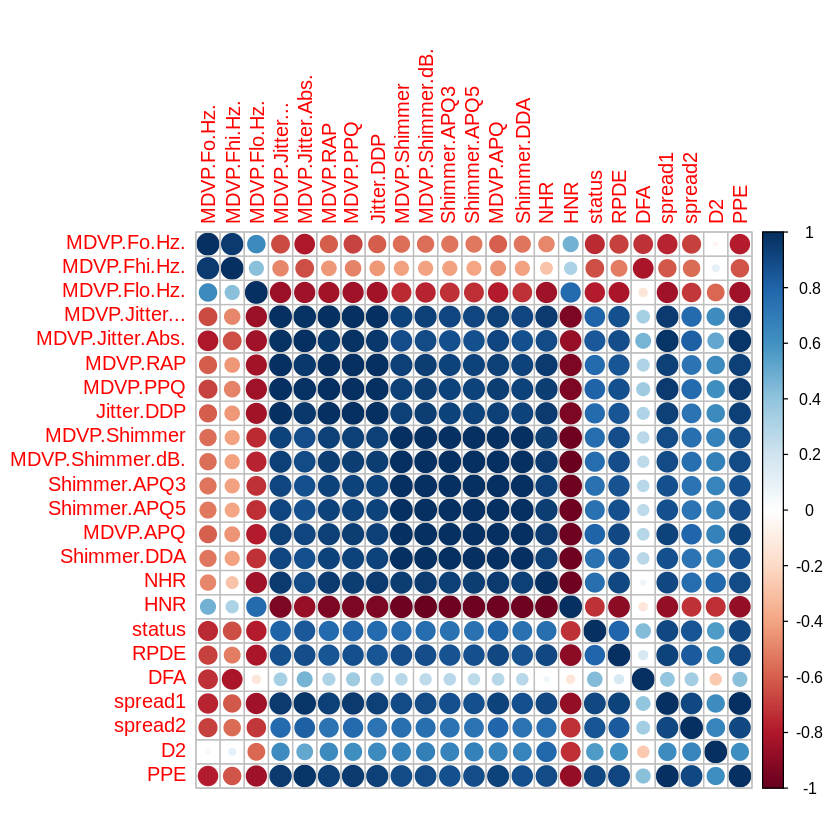

In [ ]:
#creating correlation data
pd_data2 <- transform(pd_data1, status = as.numeric(status))
cor_data <- cor(pd_data2, method = c("spearman"))

#creating correlation matrix
cor_matrix <- round(cor(cor_data),2)

#visualizing correlation matrix

corrplot::corrplot(cor_matrix, method = "circle")

In [ ]:
#printing attrbutes that are highly correlated with a cutoff of 0.9
highlyCorrelated <- findCorrelation(cor_matrix, cutoff=0.9)
print(highlyCorrelated)
#The highly correlated attribute no.s are: 23 20  7  4  5 13  6  8 10  9 12 11 14 16  1

 [1] 23 20  7  4  5 13  6  8 10  9 12 11 14 16  1


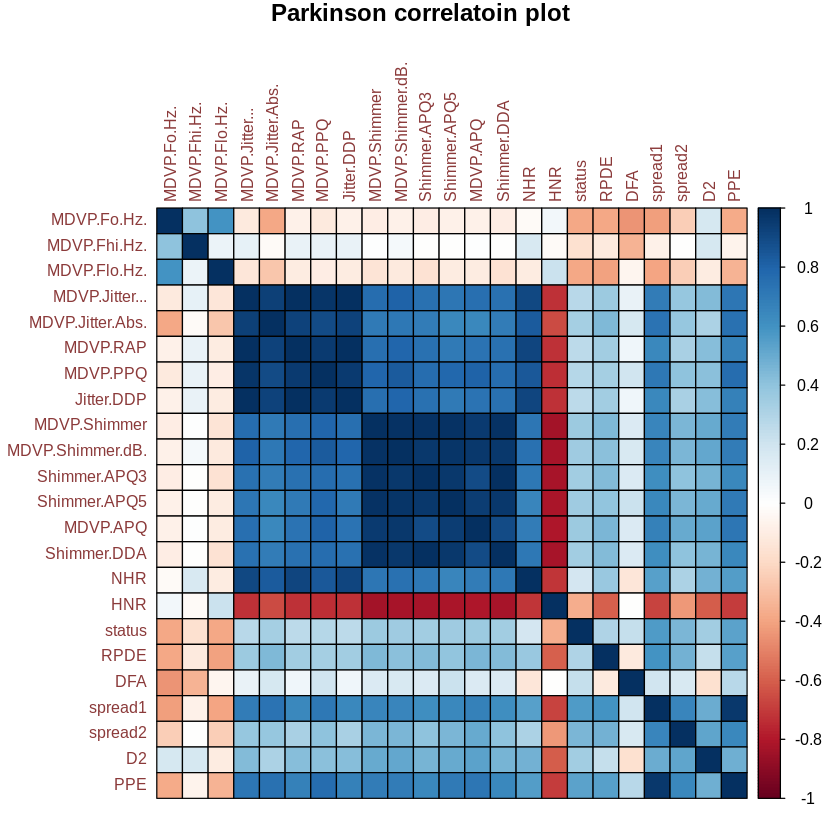

In [ ]:
corrplot(cor(pd_data1), type="full", method ="color", title = "Parkinson correlatoin plot", mar=c(0,0,1,0), tl.cex= 0.8, outline= T, tl.col="indianred4")

In [ ]:
# Remove columns with near zero variance

# Calculate preprocessing parameters from the dataset
varParams <- preProcess(pd_data1[, -17], method=c("nzv"))
# Summarize preprocess parameters
print(varParams)

Created from 195 samples and 0 variables

Pre-processing:
  - ignored (0)



In [ ]:
# Find highly correlated independent variables
print(findCorrelation(cor(pd_data1), cutoff=0.9))

# Remove highly correlated independent variables
pd_data2 <- pd_data1[, -c(findCorrelation(cor(pd_data1), cutoff=0.9))]

# Dataset without high correlation between independent variables
head(pd_data2, 5)

 [1] 10  9  7 13  4 14 11 23  5  6  8


,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,Shimmer.APQ5,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,119.992,157.302,74.997,0.03130,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
2,122.400,148.650,113.819,0.04518,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
3,116.682,131.111,111.555,0.03858,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
4,116.676,137.871,111.366,0.04005,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
5,116.014,141.781,110.655,0.04825,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180


In [ ]:
# For classification, the dependent variable should be of class factor
pd_data2$status = as.factor(pd_data2$status)

# Recheck classes of all variables
sapply(pd_data2, class)

MDVP.Fo.Hz. MDVP.Fhi.Hz. MDVP.Flo.Hz. Shimmer.APQ5          NHR          HNR 
   "numeric"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric" 
      status         RPDE          DFA      spread1      spread2           D2 
    "factor"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric"

In [ ]:
# Scale dataset

# Calculate preprocessing parameters from the dataset
normParams <- preProcess(pd_data2[, -17], method=c("range"))
# Summarize preprocess parameters
print(normParams)
# Transform the dataset using above parameters
pd_data2[, -17] <- predict(normParams, pd_data2[, -17])
summary(pd_data2)

Created from 195 samples and 12 variables

Pre-processing:
  - ignored (1)
  - re-scaling to [0, 1] (11)



  MDVP.Fo.Hz.      MDVP.Fhi.Hz.      MDVP.Flo.Hz.     Shimmer.APQ5    
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.1702   1st Qu.:0.06679   1st Qu.:0.1083   1st Qu.:0.05265  
 Median :0.3520   Median :0.15041   Median :0.2236   Median :0.10543  
 Mean   :0.3836   Mean   :0.19384   Mean   :0.2927   Mean   :0.16524  
 3rd Qu.:0.5498   3rd Qu.:0.24916   3rd Qu.:0.4292   3rd Qu.:0.22632  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.00000  
      NHR               HNR         status       RPDE             DFA        
 Min.   :0.00000   Min.   :0.0000   0: 48   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.01679   1st Qu.:0.4372   1:147   1st Qu.:0.3844   1st Qu.:0.4003  
 Median :0.03504   Median :0.5545           Median :0.5586   Median :0.5895  
 Mean   :0.07702   Mean   :0.5464           Mean   :0.5646   Mean   :0.5730  
 3rd Qu.:0.07954   3rd Qu.:0.6760           3rd Qu.:0.7723   3rd Qu.:0.7474  
 Max.   :1.00000   Max.   :1.0000  

In [ ]:
# Prepare resampling method
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
metric <- "Accuracy"

# Logistic Regression
set.seed(7)
fit.lr <- train(status ~ ., data=pd_data2, method="glm", metric=metric, trControl=trainControl)


In [ ]:
fit.lr

Generalized Linear Model 

195 samples
 11 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 175, 175, 175, 176, 175, 175, ... 
Resampling results:

  Accuracy   Kappa    
  0.8477973  0.5623187


In [ ]:
# KNN
set.seed(7)
fit.knn <- train(status ~ ., data=pd_data2, method="knn", metric=metric, trControl=trainControl)

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
# Random Forest
set.seed(7)
fit.rf <- train(status ~ ., data=pd_data2, method="rf", metric=metric, trControl=trainControl)

In [ ]:
# Collect resamples
results <- resamples(list(LR=fit.lr, KNN=fit.knn, RF=fit.rf))
summary(results)



Call:
summary.resamples(object = results)

Models: LR, KNN, RF 
Number of resamples: 30 

Accuracy 
    Min. 1st Qu.    Median      Mean   3rd Qu. Max. NA's
LR  0.70     0.8 0.8500000 0.8477973 0.9000000    1    0
KNN 0.80     0.9 0.9473684 0.9266179 0.9500000    1    0
RF  0.85     0.9 0.9000000 0.9269786 0.9493421    1    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
LR  0.0000000 0.4666667 0.5681570 0.5623187 0.6923077    1    0
KNN 0.4666667 0.7333333 0.8571429 0.8030312 0.8750000    1    0
RF  0.5714286 0.6923077 0.7333333 0.7875939 0.8565976    1    0


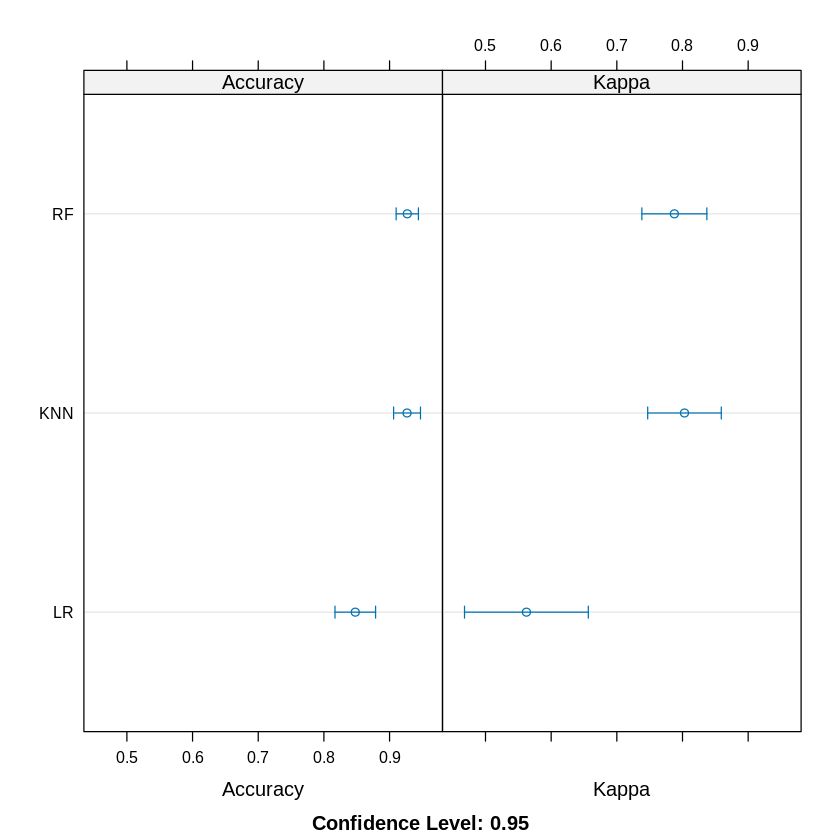

In [ ]:
dotplot(results)

In [ ]:
install.packages("caTools")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
split=sample.split(Y=pd_data2$status,SplitRatio=2/3)
train_set=subset(x=pd_data2,split==T)
test_set=subset(x=pd_data2,split==F)

In [ ]:
install.packages("class")
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
y_pred=knn(train_set[,-17],test=test_set[,-17],cl=train_set[,17],k=5)
y_pred

ERROR: ignored